## Matplotlib

### 1. Введение 

Matplotlib это python-библиотека для двумерной графики созданная в 2003 году как альтернатива платному MATLAB'y. Проект оказался настолько успешным, что matplotlib является стандартом для двумерной графики в анализе данных на python. Используя matplotlib можно нарисовать очень сложные графики, поэтому порог входа у него высокий. Для простых графиков есть удобные обертки, но кастомизация требует понимания деталей.

In [1]:
import matplotlib as mpl  # стандартный алиас для matplotlib

Matplotlib состоит из множетства модулей и классов. Рисование в matplotlib состоит из последовательного нанесения объектов на холст. Объекты образуют иерархическую структуру. Задача пользователя описать эту структуру, а рисованием займется сама библиотека.

Рисунок в matplotlib имеет следующую структуру. Есть объект рисунок(Figure), в нем есть холст(Canvas) на котором может быть 1 или несколько областей рисования (Axes). Области рисования содержат элементы рисунка (Artists). Обычные пользователи большую часть времени занимаются тем что работают с элементами рисунка располагая их в нужном порядке на областях рисования. Элементы рисунка (Artists) можно разделить на две большие группы

 - **Примитивы** - простейшие элементы рисунка, такие как линии, прямоугольники, текст, изображения и т.д.
 - **Контейнеры** - рисунок (Figure), область рисования (Axes), координатные оси (Axis), деления на осях (Ticks).  

Библиотека манипулирует очень простыми графическими примитивами (линия, точка, отрезок, многоугольник), что совершенно неудобоно для людей - они мыслят высокоуровневыми абстракциями. Поэтому в matplotlib есть две обертки pylab и pyplot. Первая считается неудачным экспериментом - не используйте ее. Мы будем работать с pyplot.

In [1]:
import matplotlib.pyplot as plt  # стандартный алиас для pyplot

Для того чтобы рисунки выводились в графический интерфейс надо вызвать [магическую команду](https://ipython.readthedocs.io/en/stable/interactive/magics.html) для jupyter 

In [4]:
#  Достаточно вызвать один раз
%matplotlib inline
# Без параметра inline изображения будут выводиться не в jupyter notebook, а в отдельное окно 

Также нам очень пригодится библиотека numpy для работы с многомерными массивами. С ее помощью можно быстро поэлементно применять математические функции и генерировать массивы.

In [2]:
import numpy as np  # стандартный алиас для numpy

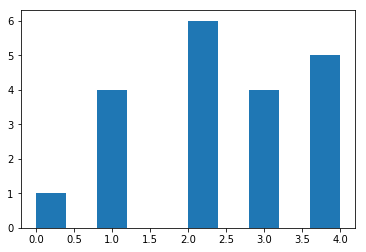

In [5]:
# создать рисунок гистограммы из 20 рандомных чисел в диапазоне от 0 до 6 невключительно
plt.hist(np.random.randint(low=0, high=6, size=20)) 
# Сохранить ПОСЛЕДНИЙ созданный рисунок
plt.savefig('hist.png', fmt='png')
# показать ВСЕ созданные рисунки
plt.show()

При вызове этих команд произошло приблизительно следующее. Был создан рисунок (Figure). В нем была создана одна область рисования (Axes).  На эту область были помещены оси X и Y (Axis) и 10 синих прямоугольников (Rectangle) 4 из которых нулевой высоты. После этого у объекта рисунка вызвали методы savefig и show.

### 2. Основные функции модуля matplotlib.pyplot

Далее мы перечислим самые часто используемые функции из модуля matplotlib.pyplot. Примеры будут минималистичны, все настройки будут по умолчанию.

#### 2.1 Примитивы

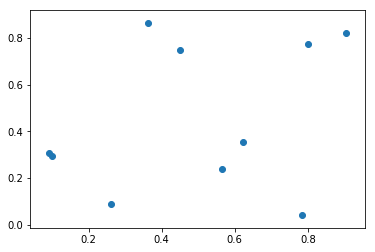

In [6]:
# Точки (aka scatter plot) 
plt.scatter(
    np.random.rand(10),  # абсциссы точек
    np.random.rand(10)  # ординаты точек
)
plt.show()

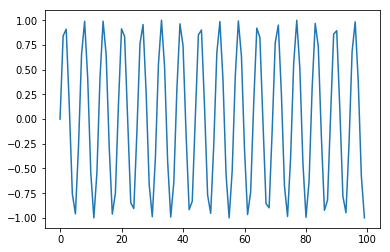

In [7]:
# Ломаная линия
plt.plot(
    np.arange(100),  # абсциссы точек
    np.sin(np.arange(100))  # ординаты точек
)
plt.show()

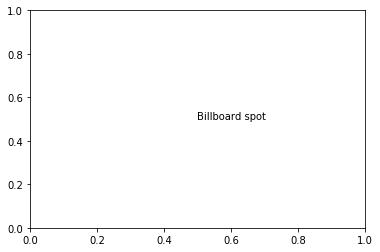

In [8]:
# Текст
plt.text(
    0.5,  # Абсцисса начала текста в координатах графика
    0.5,  # Ордината начала текста в координатах графика
    'Billboard spot'  # собственно ваш текст
)
plt.show()

#### 2.2. Диаграммы

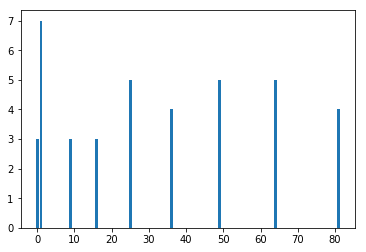

In [9]:
# Столбцовая диаграмма
plt.bar(
    np.arange(10) ** 2,  # Позиции столбцов
    np.random.randint(low=0, high=10, size=10)  # Высоты столбцов
)
plt.show()

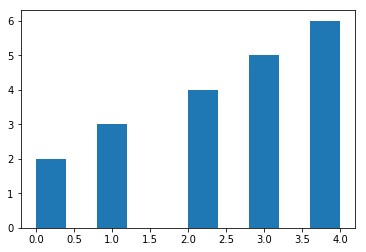

In [10]:
# Гистограмма
plt.hist(np.random.randint(low=0, high=5, size=20))
plt.show()

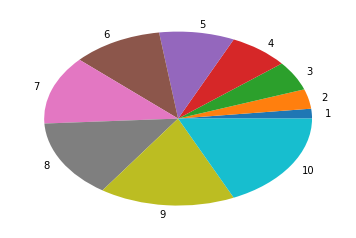

In [11]:
#  Круговая диаграмма
plt.pie(
    np.arange(1, 11),
    labels=map(format, range(1,11))
)
plt.show()

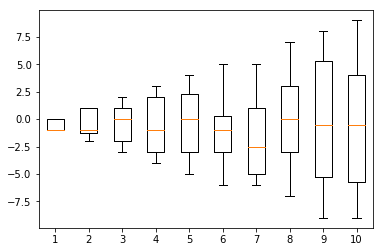

In [12]:
# Ящик с усами.
# Каждый ящик показывает диапазон от 25 до 75 квантили в значениях, а усы - максимум и минимум в значениях
plt.boxplot(
    [
        np.random.randint(low=-i, high=i, size=20) # Значения по которым строится ящик №i
        for i in range(1, 11)
    ]
)
plt.show()

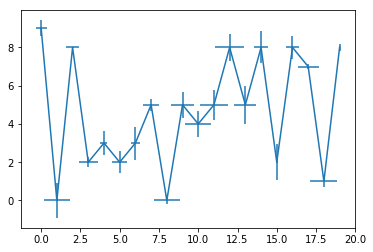

In [13]:
# Усы. В каждой точке графика откладываются ошибки измерений по абсциссе и ординате
plt.errorbar(
    np.arange(20),  # абсциссы точек 
    np.random.randint(low=0, high=10, size=20),  # ординаты точек  
    xerr=np.random.rand(20),  # ошибки расположения каждой точки по оси x
    yerr=np.random.rand(20)  # ошибки расположения каждой точки по оси y
)
plt.show()

#### 2.3. Отображения

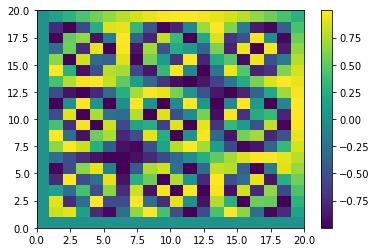

In [14]:
# Цветовое представление двумерного массива
# Построить цветовую карту
color_map = plt.pcolor(
    np.sin(np.outer(np.arange(20), np.arange(20)))  # двумерный массив значений
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()
del color_map

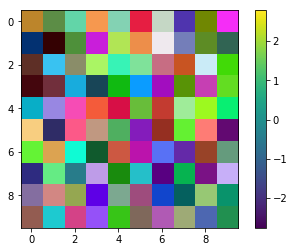

In [15]:
# Цветовое представление двумерного массива
# Построить цветовую карту
color_map = plt.imshow(
    np.random.normal(size=(10,10,3))  # рандомное RGB - изображение, цветовые каналы представлены числaми из [0,1]
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()
del color_map

#### 2.4. Контурные рисунки

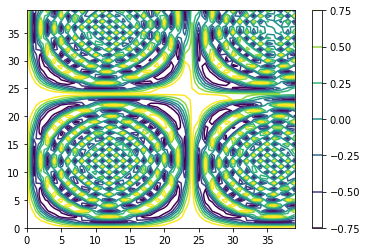

In [16]:
# Строим контурное изображение
contours = plt.contour(
    np.cos(  # Возьмем чтобы было весело
        np.outer(  # умножаем колонку на столбец чтобы получить матрицу
            np.linspace(start=0, stop=20, num=40),  # сгенерировать равномерную сетку из 40 точек на отрезке [0, 20]
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавляем шкалу
plt.colorbar(contours)
plt.show()

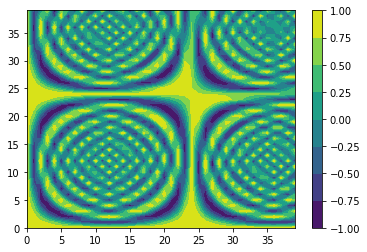

In [17]:
# Строим контурное изображение c заливкой
contours = plt.contourf(
    np.cos(
        np.outer(
            np.linspace(start=0, stop=20, num=40),
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавляем шкалу
plt.colorbar(contours)
plt.show()
del contours

#### 2.5. Заливка

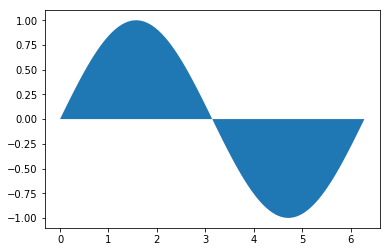

In [18]:
# Простейшая заливка - заливается область между графиком функции и осью абсцисс
plt.fill(
    np.linspace(start=0, stop=2*np.pi, num=100),  # абсциссы точек
    np.sin(np.linspace(start=0, stop=2*np.pi, num=100))  # ординаты точек
)
plt.show()

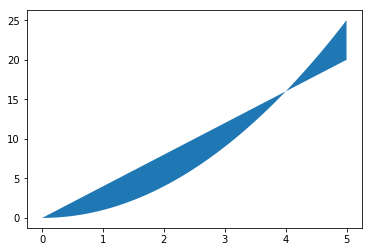

In [19]:
# Заливка между двумя графиками функций
plt.fill_between(
    np.linspace(0, 5, 100),  # абсциссы точек
    np.linspace(0, 5, 100) ** 2,  # ординаты первой кривой 
    np.linspace(0, 5, 100) * 4  # ординаты второй кривой
)
plt.show()

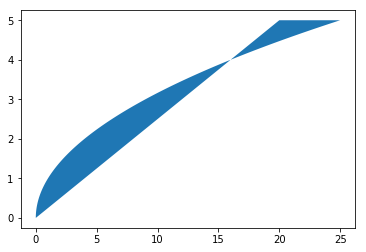

In [20]:
# Заливка между двумя графиками функций
plt.fill_betweenx(
    np.linspace(0, 5, 100),  # ОРДИНАТЫ точек
    np.linspace(0, 5, 100) ** 2,  # АБСЦИССЫ первой кривой 
    np.linspace(0, 5, 100) * 4  # АБСЦИССЫ второй кривой
)
plt.show()

#### 2.5 Векторные диаграммы

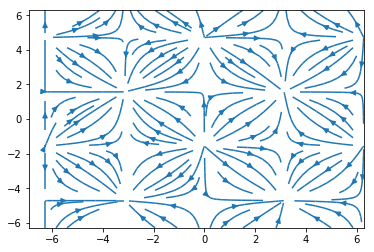

In [21]:
# Векторный поток
# Готовим координатную сетку
n_points = 1000
x = np.linspace(-2*np.pi, 2*np.pi, n_points)
y = np.linspace(-2*np.pi, 2*np.pi, n_points)
# Координаты векторов в координатной сетке
vx, vy = np.meshgrid(np.sin(x), np.cos(y))
plt.streamplot(x, y, vx, vy)
plt.show()
del n_points, x, y, vx, vy

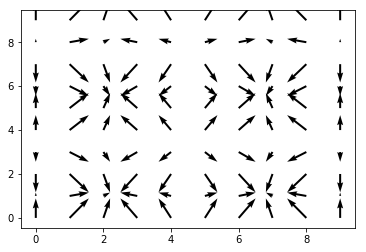

In [22]:
# Векторное поле
# Готовим координатную сетку
n_points = 10
x = np.linspace(-2*np.pi, 2*np.pi, n_points)
y = np.linspace(-2*np.pi, 2*np.pi, n_points)
# Координаты векторов в координатной сетке
vx, vy = np.meshgrid(np.sin(x), np.cos(y))
plt.quiver(vx, vy)
plt.show()
del n_points, x, y, vx, vy

Ну что же это было краткое введение. Его достаточно для рисования большинства графиков, но это конечно же не все что может matplotlib. Так что советую продолжить чтение.

### 2.2. Сложные примеры

#### 2.2.1. Работа с текстом

Разберем пример показывающий какие элементы рисунка могут быть на области рисования и какие у них могут быть настройки. Мы нарисуем рисунок на котором будет
 - одна область рисования
 - заголовок рисунка
 - заголовок графика
 - график функции $\cos(x^2)$
 - аннотация
 - текст в рамке
 - подписи к осям X и Y
 - легенда
 - координатная сетка
 
Все именованные параметры функций являются опциональными. Поудаляйте их чтобы увидеть как по умолчанию отображаются эти элементы.

In [3]:
#  Генерируем данные
step = 0.01
# создать массив чисел от 0 до 2pi с шагом 0.01
x = np.arange(0.0, 2*np.pi + step, step)
#  посчитать cos(x^2) от полученной сетки x'ов
y = np.cos(x * x)

# Создать рисунок 
fig = plt.figure(
    figsize=(16, 9),  # размером 16 на 9 дюймов
    facecolor='whitesmoke',  # c подложкой цвета белый дым
    dpi=200  # разрешением 200 точек
)

# Добавить заголовок рисунка с 30-м шрифтом
plt.suptitle('This is a title for the whole figure', fontsize=30);

<Figure size 3200x1800 with 0 Axes>

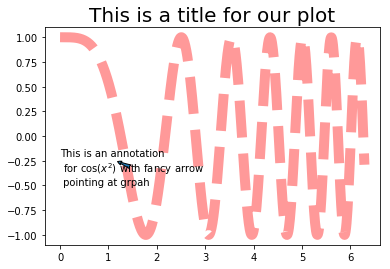

In [4]:
# Добавить заголовок графика
plt.title('This is a title for our plot', fontsize=20)

# Нарисовать cos(x^2)
plt.plot(
    x, y,
    color='red',  # Цвет красный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\cos(x^2)$' # Подпись в легенде. Можно использовать TeX!
)

# Добавим аннотацию
plt.annotate(
    'This is an annotation\n for $\cos(x^2)$ with fancy arrow\n pointing at grpah',
    xy=(1.15, -0.25),  #  точка куда будет указывать стрелка
    arrowprops=dict(arrowstyle='fancy'),
    xytext=(0, -0.5)  # расположение аннотации
);

No handles with labels found to put in legend.


Text(0,0.5,'This is a Y axis label')

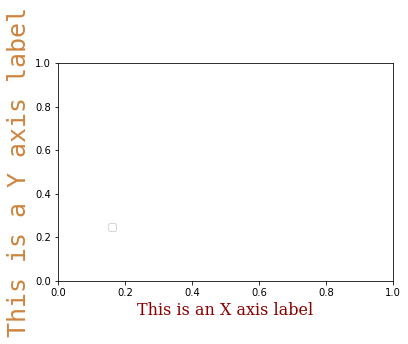

In [5]:
# Поставить легенду
plt.legend(
    loc='lower left',  # Снизу слева
    borderaxespad=5  # С отступом 5 от осей
)

# Добавить подписи к осям X и Y
plt.xlabel(
    'This is an X axis label',  # Текст
    fontdict=dict(family='serif', color='darkred', weight='normal', size=16)  # Настройки шрифта
)
plt.ylabel(
    'This is a Y axis label',
    fontdict=dict(family='monospace', color='peru', weight='light', size=25)
)

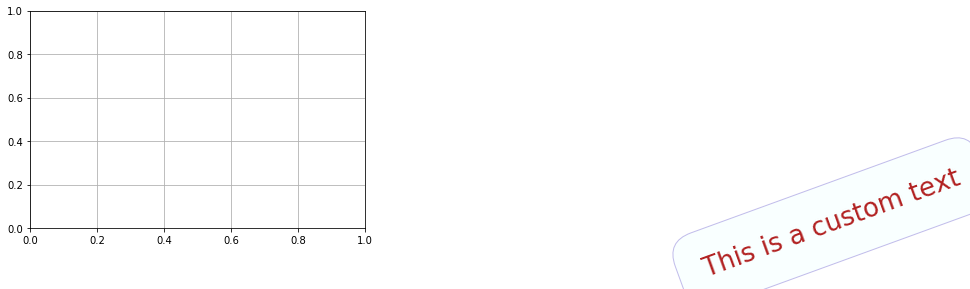

In [6]:
# Добавить текст
plt.text(
    2.0, 0.2,  # Позиция начала текста
    'This is a custom text',  # Собственно сам текст
    fontsize=26,  # Размер шрифта
    color='firebrick',  # Цвет букв
    rotation=20,
    bbox=dict(  # Параметры рамки ограничивающей текст
        alpha=0.4, # Прозрачность фона рамки
        edgecolor='slateblue',  # цвет рамки
        facecolor='azure',  # цвет подложки
        pad=1., # отступ рамки от текст
        boxstyle='round'  # форма рамки
    )
)

# Добавить координатную сетку
# Получающиеся вертикальные линии это Xticks, а горизонтальные Yticks
plt.grid(True)

plt.show()
del step, x, y, fig

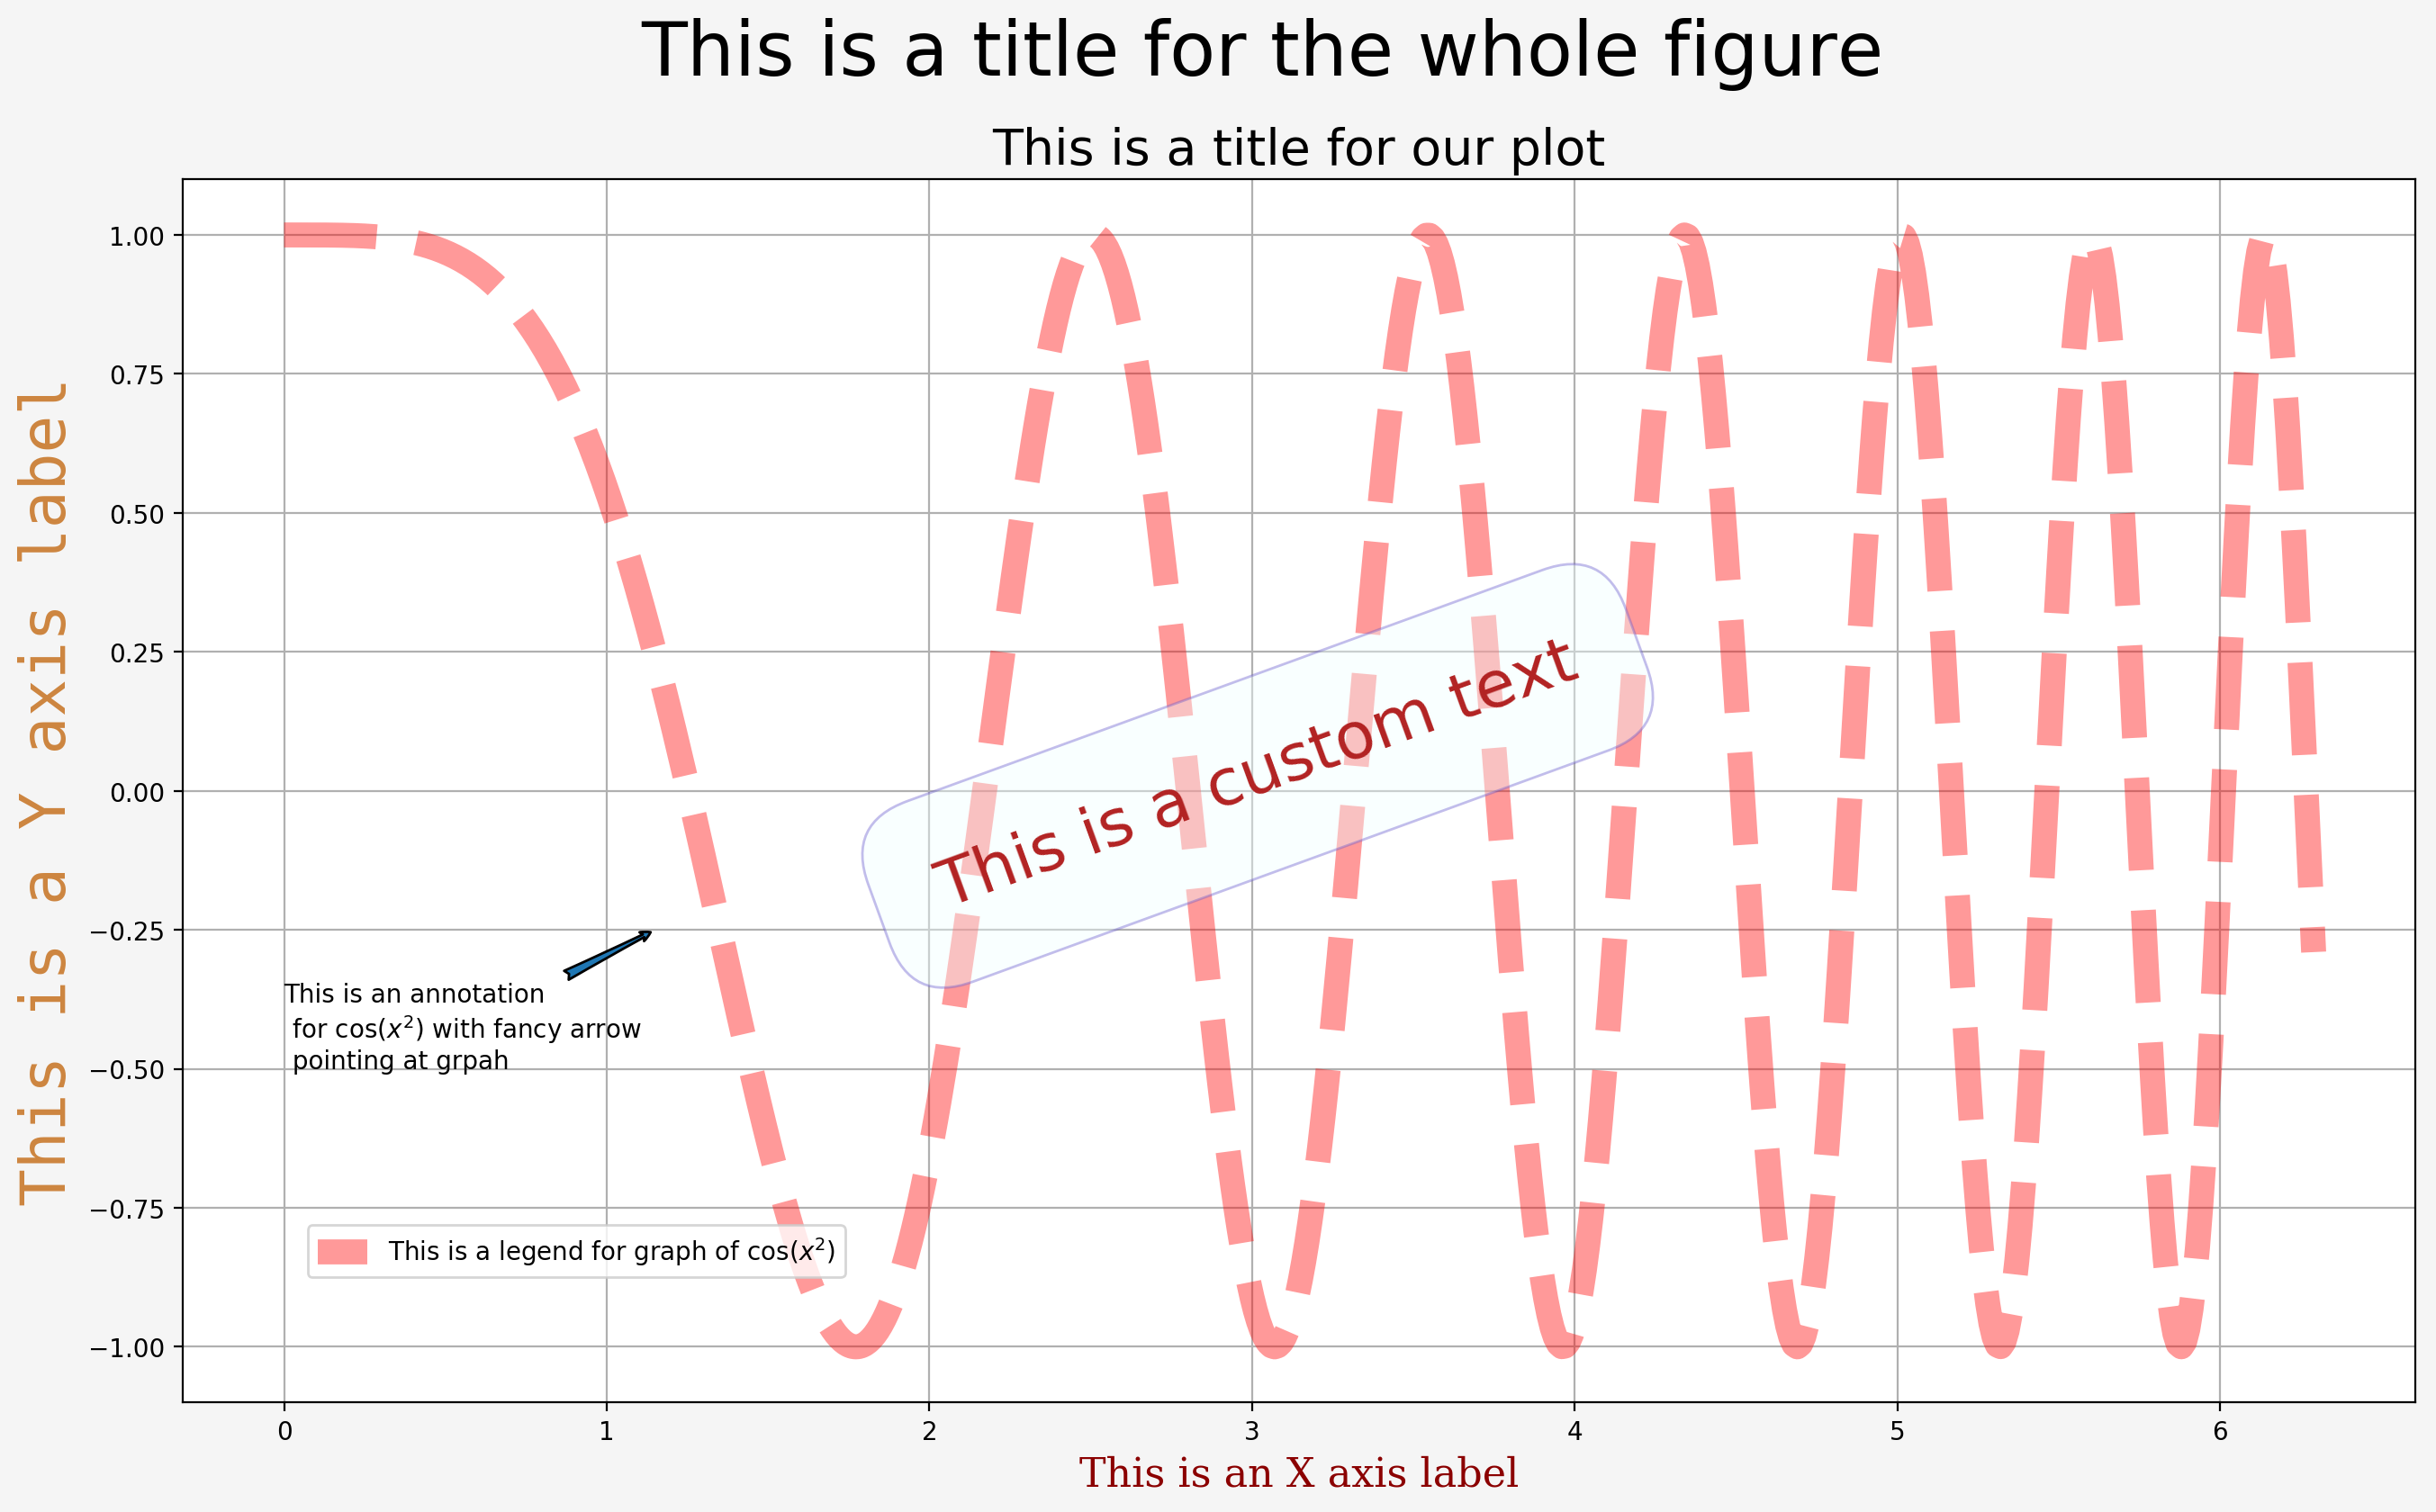

In [7]:
#  Генерируем данные
step = 0.01
# создать массив чисел от 0 до 2pi с шагом 0.01
x = np.arange(0.0, 2*np.pi + step, step)
#  посчитать cos(x^2) от полученной сетки x'ов
y = np.cos(x * x)

# Создать рисунок 
fig = plt.figure(
    figsize=(16, 9),  # размером 16 на 9 дюймов
    facecolor='whitesmoke',  # c подложкой цвета белый дым
    dpi=200  # разрешением 200 точек
)

# Добавить заголовок рисунка с 30-м шрифтом
plt.suptitle('This is a title for the whole figure', fontsize=30)

# Добавить заголовок графика
plt.title('This is a title for our plot', fontsize=20)

# Нарисовать cos(x^2)
plt.plot(
    x, y,
    color='red',  # Цвет красный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\cos(x^2)$' # Подпись в легенде. Можно использовать TeX!
)

# Добавим аннотацию
plt.annotate(
    'This is an annotation\n for $\cos(x^2)$ with fancy arrow\n pointing at grpah',
    xy=(1.15, -0.25),  #  точка куда будет указывать стрелка
    arrowprops=dict(arrowstyle='fancy'),
    xytext=(0, -0.5)  # расположение аннотации
)

# Поставить легенду
plt.legend(
    loc='lower left',  # Снизу слева
    borderaxespad=5  # С отступом 5 от осей
)

# Добавить подписи к осям X и Y
plt.xlabel(
    'This is an X axis label',  # Текст
    fontdict=dict(family='serif', color='darkred', weight='normal', size=16)  # Настройки шрифта
)
plt.ylabel(
    'This is a Y axis label',
    fontdict=dict(family='monospace', color='peru', weight='light', size=25)
)

# Добавить текст
plt.text(
    2.0, 0.2,  # Позиция начала текста
    'This is a custom text',  # Собственно сам текст
    fontsize=26,  # Размер шрифта
    color='firebrick',  # Цвет букв
    rotation=20,
    bbox=dict(  # Параметры рамки ограничивающей текст
        alpha=0.4, # Прозрачность фона рамки
        edgecolor='slateblue',  # цвет рамки
        facecolor='azure',  # цвет подложки
        pad=1., # отступ рамки от текст
        boxstyle='round'  # форма рамки
    )
)

# Добавить координатную сетку
# Получающиеся вертикальные линии это Xticks, а горизонтальные Yticks
plt.grid(True)

plt.show()
del step, x, y, fig

#### 2.2.2. Полярные координаты

Область рисования может быть непрямоугольной, напрмер если вы используете полярные координаты. В этом случае вам придется самостоятельно создать область рисования. Мы создадим ее методом add_axes указав размеры прямоугольника в котором будет находится область рисования. Тут стоит сказать, что на рисунке действуют относительные координаты, в диапазоне от 0 до 1. В этом примере мы будем использовать более объектно ориентированный подход и будем вызывать методы объектов, а не функции модуля plt. Использовать функции модуля plt считается плохим тоном так как вы постоянно оперируете глобальным сосотоянием к которому еще и не имеете доступа.

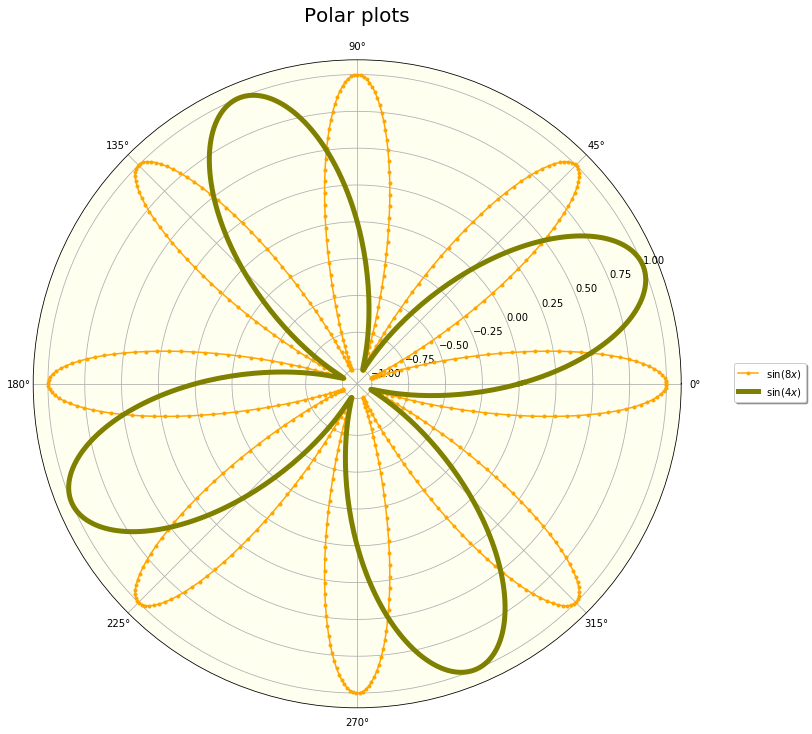

In [12]:
# Готовим данные
step = 0.01
phi = np.arange(0.0, 2*np.pi + step, step)
rho1 = np.cos(8 * phi)
rho2 = np.sin(4 * phi)

fig = plt.figure(figsize=(16, 9))
# Создать область рисования для полярных координат с подложкой цвета слоновой кости :)
# Левый нижний угол будет в точке (0,0)
# Ширина и высота соответственно 1 и 1 (то есть на весь рисунок)
ax = fig.add_axes([0,0,1,1], polar=True, facecolor='ivory')

ax.set_title('Polar plots', fontsize=20)

ax.plot(
    phi, rho1,
    color='orange', 
    marker='o',  # Добавить круглые метки в тех точках по которым строилась линия
    markersize=3,  #  Размер меток
    label='$\sin(8x)$'
)

ax.plot(
    phi, rho2,
    linewidth=5,
    color='olive',
    label='$\sin(4x)$'
)

# Раз мы указали label, то надо сделать легенду
ax.legend(
    bbox_to_anchor=(1.2, 0.54),  # кастомное положение легенды
    fancybox=True,
    shadow=True
)

ax.grid(True)

plt.show()
del step, phi, rho1, rho2, fig, ax

#### 2.2.3. Разные типы графиков на одном рисунке

Мы нарисуем 
 - набор случайных измерений функци $cos(x)$ к которому добавив белый шум с нулевым средним и дисперсией 0.25
 - собственно график cos(x)
 - и область в которой лежат изменения отстоящие не более чем на 1 сигму

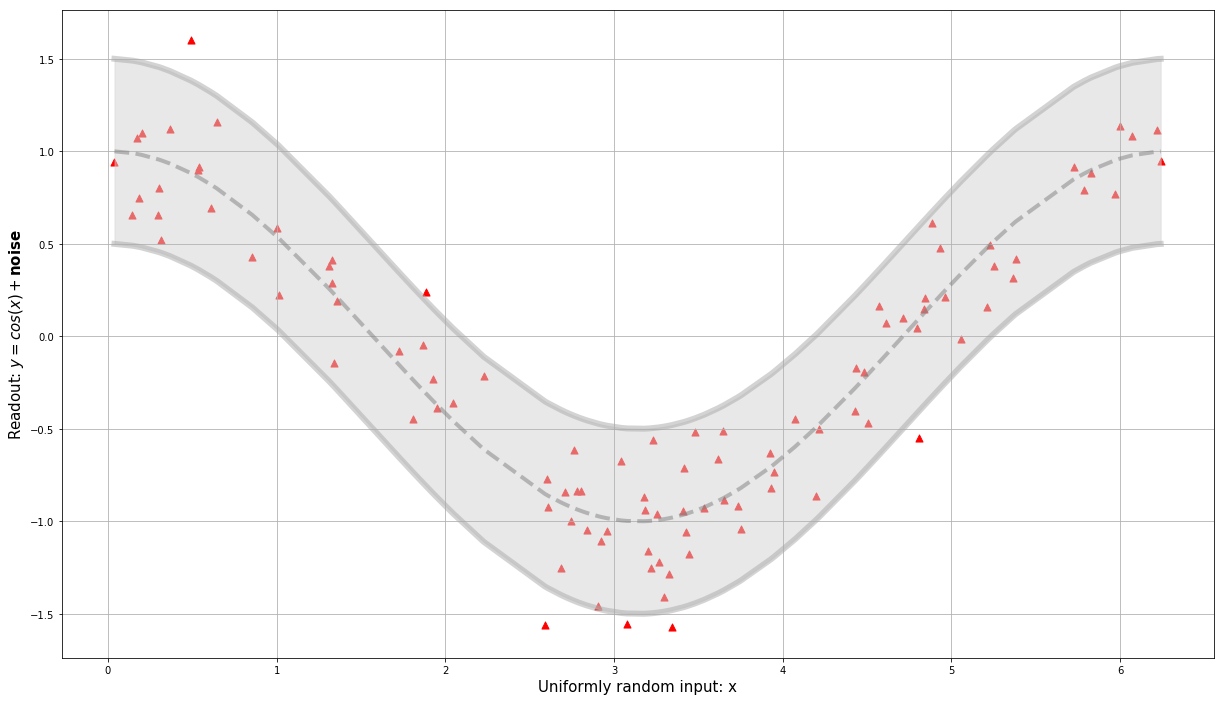

In [25]:
# Готовим данные
scale = 0.5
n_points = 100
x = 2 * np.pi * np.sort(np.random.rand(100))
y = np.cos(x)
y_noise = y + np.random.normal(scale=0.25, size=n_points)

# Готовим рисунок
fig = plt.figure(figsize=(16, 9))
# Готовим область рисования.
ax = fig.add_axes([0, 0, 1, 1])  

# Собственно scatter plot
ax.scatter(
    x, y_noise,
    marker='^',  # Отмечаем точки треугольниками
    s=50,  # Размера 50
    color='red'  #  Красного цвета
)

# График самой функции cos(x)
ax.plot(
    x, y,
    color='grey',
    linestyle='--',
    alpha=0.5,
    linewidth=4
)

# Графики отклоненний на 1 сигму
for shift in (scale, -scale):
    ax.plot(
        x, y + shift,
        alpha=0.5,
        color='darkgrey',
        linewidth=6
    )

# Сделаем заливку всего что находится между отклонениями
ax.fill_between(
    x, y - scale, y + scale,
    alpha=0.5,
    color='lightgrey',
)

# Подпишем оси
ax.set_xlabel('Uniformly random input: x', fontsize=15)
ax.set_ylabel('Readout: $y=cos(x)+\mathbf{noise}$', fontsize=15)
    
ax.grid(True)

plt.show()
del scale, n_points, x, y, y_noise, fig, ax

Как вы видели по последним примерам большая часть рисования происходит через работу с областью рисования (Axes). Этот объект-контейнер содержит в себе другие контейнеры и обеъекты-примитивы. Видно, что существует множество методов для создания и изменения свойств элементов рисунков и графических примитивов. Всё, что можно сделать через pyplot, можно сделать работая непосредственно с axes-экземплярами. Получаются такие соответствия:

Метод объекта Axes -> Краткое опписание -> объект типа Artist создаваемый методом -> Контейнер в котором будет храниться Artist

    ax.annotate -> текстовая подпись -> Annotate -> ax.texts

    ax.text -> текст -> Text -> ax.texts

    ax.bar -> столбчатая диаграмма -> Rectangle -> ax.patches

    ax.errorbar -> график погрешностей -> Line2D и Rectangle -> ax.lines и ax.patches

    ax.fill -> заливка области -> Polygon -> ax.patches

    ax.hist -> гистограмма -> Rectangle -> ax.patches

    ax.imshow -> изображение -> AxesImage -> ax.images

    ax.legend -> легенда -> Legend -> ax.legends

    ax.plot -> XY график -> Line2D -> ax.lines

    ax.scatter -> точечная диаграмма -> PolygonCollection -> ax.collections


#### 2.2.4. Несколько областей рисования

Зачастую необходимо расположить несколько областей на одном графике. Для этого надо создать несколько областей рисования и работать с каждой в отдельности. В следующем примере мы нарсуем график функции $x^2(2+\sin(1/x))$ и добавим еще одну область рисования для самой интересной части графика

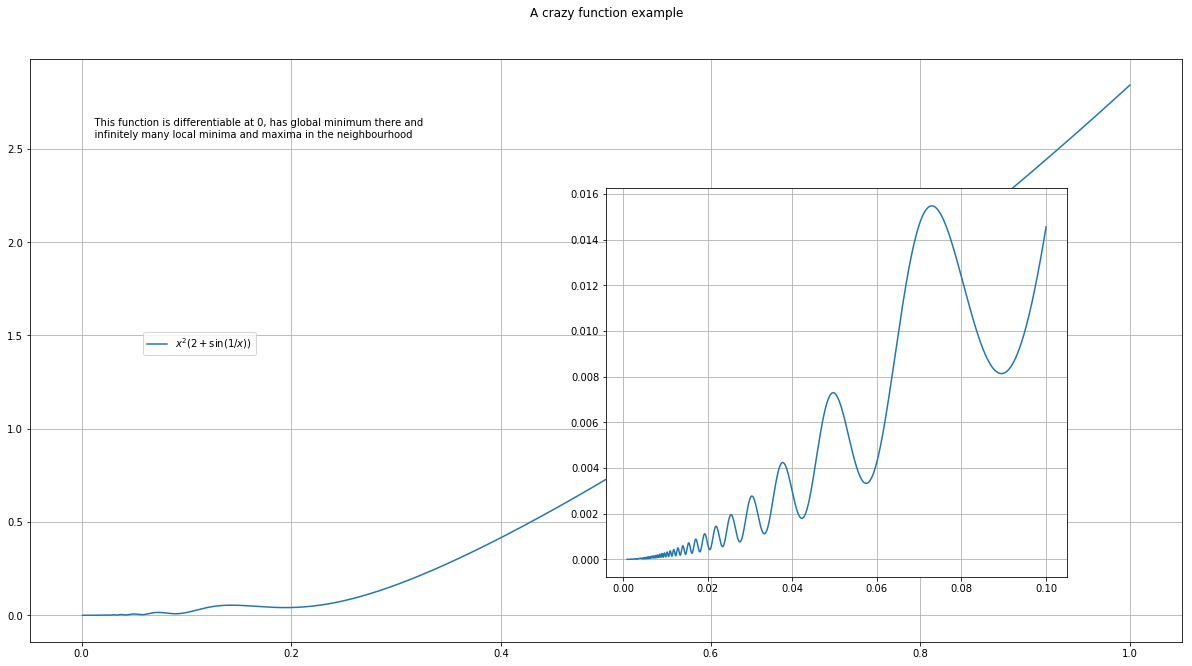

In [26]:
def crazy_func(x):
    return x * x * (2+np.sin(1/x))

fig = plt.figure(figsize=(16, 9))

fig.suptitle('A crazy function example')

# Нарисуем основной график
big_ax = fig.add_axes([0, 0, 1, 0.9])
big_ax.plot(
    np.linspace(0.001, 1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 1, 1000)),
    label='$x^2(2+\sin(1/x))$'
)
big_ax.text(
    0, 2.5,
    '''
    This function is differentiable at 0, has global minimum there and 
    infinitely many local minima and maxima in the neighbourhood
    '''
)

big_ax.legend(bbox_to_anchor=(0.2, 0.54))
big_ax.grid(True)

# Нарисуем вспомогательный график
small_ax = fig.add_axes([0.5, 0.1, 0.4, 0.6])
small_ax.plot(
    np.linspace(0.001, 0.1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 0.1, 1000))
)
small_ax.grid(True)


plt.show()
del crazy_func, fig, big_ax, small_ax

#### 2.2.5. Мультиокна

В предыдущем примере мы создали две области рисования, но их расположение пришлось задавать явно с помощью координат. В большинстве случаев такой точный уровень настройки не нужен. Для этого в matplotlib существуют мультиокна. Во многом они похожи на области рисования. Создавать их можно из объекта Figure с помощью метода add_subplots. 

При использовании метода add_subplots рисунок разбивается как таблица на некоторое число строк и столбцов. Возникающие ячейки нигде не рисуются - это удобная абстракция. Далее можно выбрать одну из этих ячеек, и рисовать в ней. Чтобы сделать это надо в функцию subplots передать три числа или трехзначное число. Первая цифра указывает количество строк, вторая - столбцов, третья - порядковый номер ячейки в которой вы хотите рисовать (нумерация начинается с 1 идет слева направо и сверху вниз). Например, вызов fig.add_subplots(3, 3, 7) разобъет рисунок на 9 равных частей и вернет вам ячейку из нижнего левого угла. 

Преимущество подхода в том что вы получаете области рисования одинакового размера не задумываясь о том какие должны быть у них координаты.

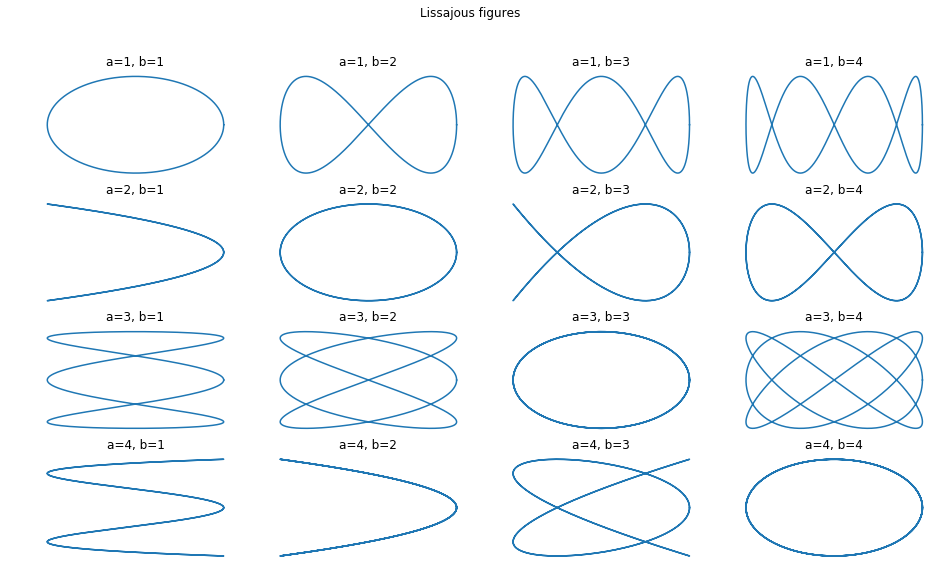

In [27]:
# Готовим данные
t = np.linspace(0, 2*np.pi, 1000)

# Здесь все как обычно
fig = plt.figure(figsize=(16, 9))
fig.suptitle('Lissajous figures')

nrows = 4
ncols = 4

for a in range(1, nrows + 1):
    for b in range(1, ncols + 1):
        # Выбираем ячейку
        ax = fig.add_subplot(nrows, ncols, (a - 1) * ncols + b)
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos(a*t),
            np.sin(b*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title('a={}, b={}'.format(a, b))

plt.show()

Иногда хочется собрать несколько графиков на одном рисунке, но их размеры должны отличаться. Для этого надо использовать объект GridSpec. 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in arccosh


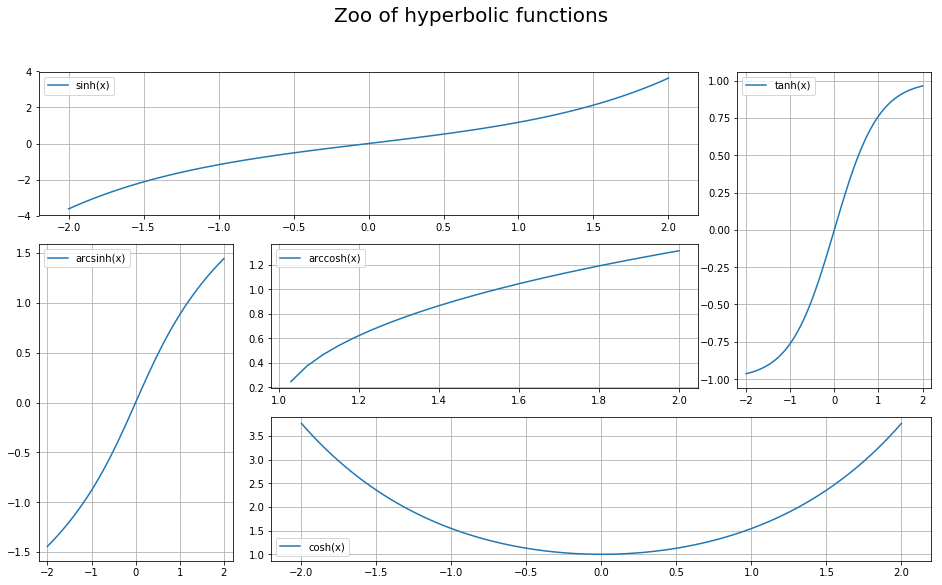

In [28]:
from matplotlib import gridspec  # GridSpec определен там

# Создаем картинку
fig = plt.figure(figsize=(16, 9))
fig.suptitle('Zoo of hyperbolic functions', fontsize=20)

# Создаем "спеку"
spec = gridspec.GridSpec(nrows=3, ncols=4)
# В метод add_suplot можно передать slicing от спеки. 
# Тем самым создастся область рисования занимающая ячейки соответствующие slicing'у 
fig.add_subplot(spec[0, :3])  # Добавить область рисования занимающую первые три ячейки первой строки
fig.add_subplot(spec[:2, 3])
fig.add_subplot(spec[2, 1:])
fig.add_subplot(spec[1:, 0])
fig.add_subplot(spec[1, 1:3])

trig_funcs = [np.sinh, np.tanh, np.cosh, np.arcsinh, np.arccosh]
points = np.linspace(-2, 2, 100)

for ax, func in zip(fig.axes, trig_funcs):
    ax.plot(
        points,
        func(points),
        label='{}(x)'.format(func.__name__)
    )
    # Выбрать самое "хорошее" расположение для легенды
    ax.legend(loc='best')
    ax.grid(True)

plt.show()
del fig, spec, ax, func

#### 2.2.6. Координатные оси

В matplotlib оси координат являются элементом рисунка, а точнее контрейнером типа Artist. Примеры - оси $x$, $y$ в декартовой системе координат, оси $r$, $\phi$ в полярной системе координат. Каждая ось содержит три группы графических примитивов: деления осей (ticks), подписи делений (tick lables), подписи осей (axis labels).

Деления на оси бывают главные и вспомогательные. Чтобы получить к ним доступ надо в методе get_ticks в аргумент which передавать 'major' или 'minor'. По умолчанию отображаются только major деления.

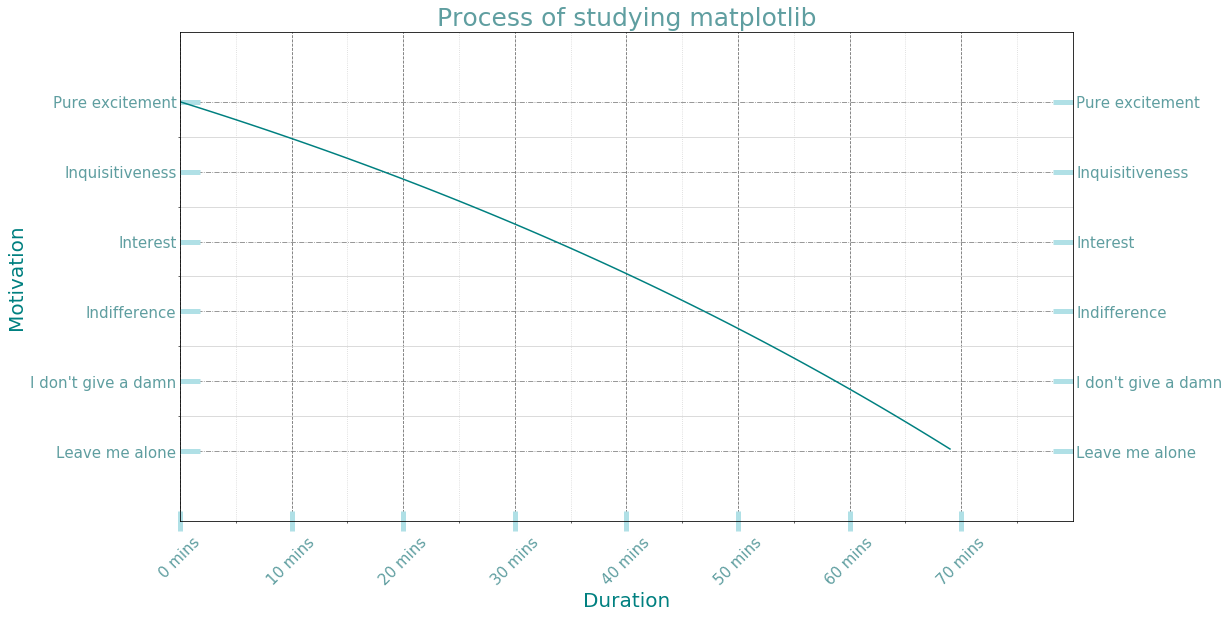

In [29]:
fig = plt.figure(figsize=(16, 9))
# Здесь мы создаем мультиокно из 1 строки и 1 столбца  выбираем 1-ю ячейку
# Такой вот странный и часто используемый способ создать область рисования
ax = fig.add_subplot(111)
ax.set_title('Process of studying matplotlib', fontsize=25, color='cadetblue')

# Здесь все как обычно - рисуем линию
ax.plot(
    np.arange(70),
    2 - np.exp(0.01 * np.arange(70)),
    color='teal'
)

# Задаем положения вспомогательных делений на оси Х
ax.set_xticks(np.arange(5, 85, 10), minor=True)
# Задаем положения основных делений
ax.set_xticks(np.arange(0, 80, 10))
# Задаем диапазон значений x который будет отрисовываться. Обынчно он шире диапазона делений
ax.set_xlim(0, 80)
# Ставим подписи к основным делениям на оси x
ax.set_xticklabels(
    ['{} mins'.format(t) for t in range(0, 80, 10)],  # текст надписей
    rotation=45,  # угол поворота надписей
    fontsize=15,
    color='cadetblue'
)
# Настраиваем параметры основных делений на оси X
ax.tick_params(
    axis='x',  
    which='major',
    direction='inout', # деления будут пересекать ось 
    length=20,  # длина делений в точках
    width=5,  # ширина делений в точках
    color='powderblue',
    top=False, bottom=True,  # рисуем делениями только снизу
    labeltop='off', labelbottom='on'  # рисуем подписи к делениям только снизу
)

# Для оси Y все настройки аналогичны
ax.set_yticks(np.arange(0.1, 1, 0.2), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(-0.2, 1.2)
ax.set_yticklabels(
    ['Leave me alone', 'I don\'t give a damn', 'Indifference', 'Interest', 'Inquisitiveness', 'Pure excitement'],
    fontsize=15,
    color='cadetblue'
)
ax.tick_params(
    axis='y', which='major',
    direction='in',
    length=20, width=5, color='powderblue',
    left=True, right=True,
    labelleft='on', labelright='on'
)

# Делаем подписи к осям
ax.set_xlabel('Duration', color='teal', fontsize=20)
ax.set_ylabel('Motivation', color='teal', fontsize=20)

# Для основных делений оси x мы строим координатную сетку пунктирной линией
ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
# Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
# Аналогично настраиваются параметры для координатной сетки по оси Y
ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')

plt.show()

При всем том, что ноутбук получился очень большим, мы не обсудили еще очень много тем: глобальные настройки через rcParams, работа со шрифтами, палитры, специальный дизайн шкалы на темпаратурной карте и т.д. и т.п. Если вам понадобятся такие возможности matplotlib, то пора садиться за [серьезные книжки](http://oez.es/Matplotlib%20for%20Python%20Developers.pdf) или даже [читать документацию](https://matplotlib.org/index.html).